# Camera Calibration with Computer Vision

## Importing the required libraries

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Setting up the images for calibration

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6 * 7,3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [5]:
# termination criteria for cv2.cornerSubPix()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [6]:
# Loading the images. 
images = glob.glob('data/*.jpg')
images

['data\\left01.jpg',
 'data\\left02.jpg',
 'data\\left03.jpg',
 'data\\left04.jpg',
 'data\\left05.jpg',
 'data\\left06.jpg',
 'data\\left07.jpg',
 'data\\left08.jpg',
 'data\\left09.jpg',
 'data\\left11.jpg',
 'data\\left12.jpg',
 'data\\left13.jpg',
 'data\\left14.jpg']

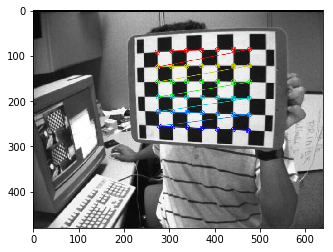

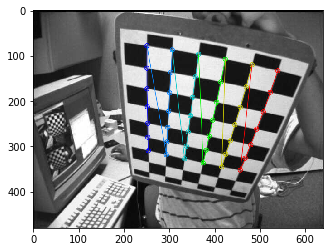

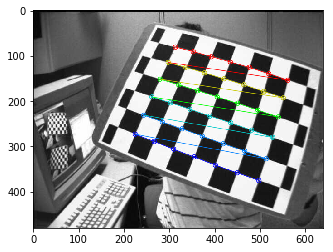

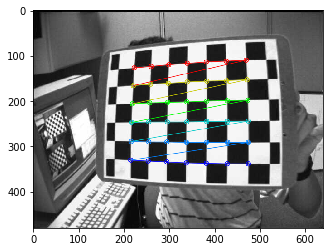

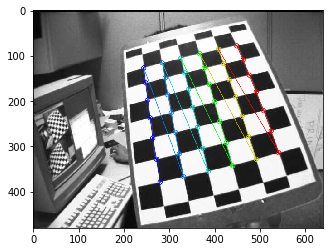

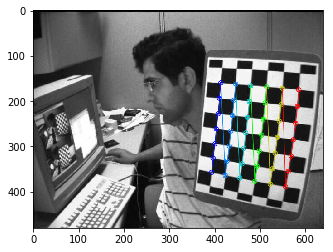

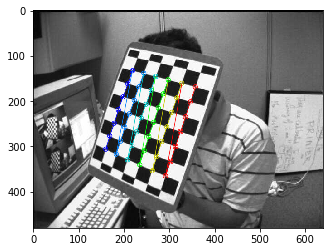

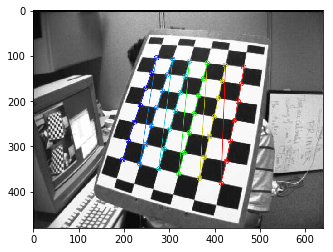

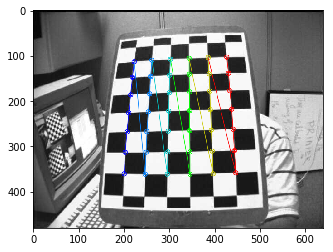

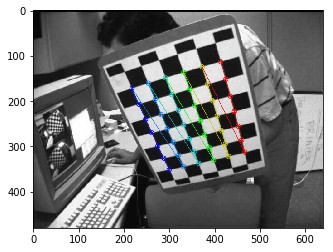

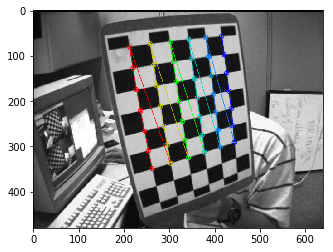

In [7]:
'''
First we load the images one by one, then we convert them into grayscale. We then find the pattern 
in chess board using the function, cv2.findChessboardCorners(), by specifying what kind of pattern 
we are looking for (here a 7x6 pattern). Once the pattern is obtained, we find the corners and 
store them in a list. Once we find the corners, we increase their accuracy using cv2.cornerSubPix()
We are also drawing the patterns using cv2.drawChessboardCorners(), and then plotting them.
'''
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        # Plotting the images using matplotlib
        plt.imshow(img)
        plt.show()

## Calibration

In [8]:
'''
Now that we have our object points and image points we are ready to go for calibration. For that 
we use the function, cv2.calibrateCamera(). It returns the camera matrix, distortion coefficients, 
rotation and translation vectors etc.
'''
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],
                                                   None, None)

## Undistortion

In [9]:
'''
After calibration, we can take an image and undistort it. But before that, we can refine the 
camera matrix based on a free scaling parameter using cv2.getOptimalNewCameraMatrix()
'''
#  Refining the camera matrix, using a specific image
img = cv2.imread('data/left12.jpg')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [10]:
# undistorting using cv2.undistort()
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

In [11]:
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('data/calibresult.png', dst)

True

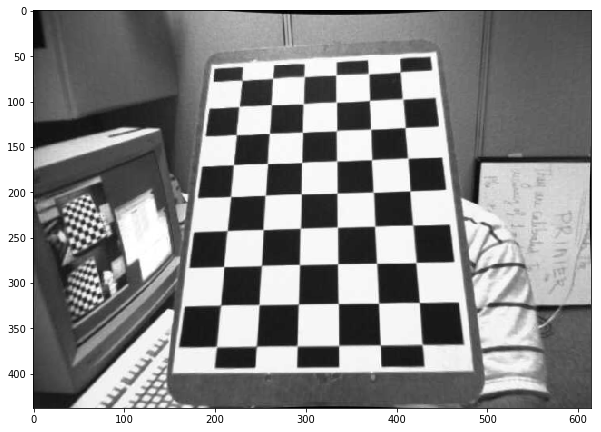

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.imread('data/calibresult.png'))
# We can see in the result that all the edges are straight.

## Re-projection Error

In [13]:
'''
Re-projection error gives a good estimation of just how exact are the found parameters. This 
should be as close to zero as possible.
'''
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    tot_error += error
    
print("Mean Error: ", tot_error/len(objpoints))

Mean Error:  0.023686004734391333
